# Series temporales y ventas
Hoy veremos qué son las series temporales y cómo analizarlas. Las series temporales son conjuntos de datos organizados y registrados en orden cronológico. En ellas cada dato representa una observación en un momento específico. El tiempo el clave en las series temporales. Gracias a él podemos hacer seguimiento y monitoreo de ventas, visitas en una página web, temperaturas, etc.

Además de eso, veremos otro concepto fundamental en las series temporales: la media móvil, la cual es una técnica de suavizado que calcula el promedio de una variable para una ventana de tiempo predeterminada. Con ella se reduce la variabilidad diaria (ruido). Por ejemplo, un _runner_ (como yo, hay que aprovechar toda oportunidad para mencionarlo) puede analizar sus tiempos diarios en las distancias que suele correr y volverse loco por los malos o buenos días, pero con la media móvil podría medir el progreso real al concentrarse en la media semanal.

## Ventas diarias de una tienda online
Nuestra serie temporal será un conjunto de datos de las ventas diarias de una página web. Identificaremos algunas tendencias con la _media móvil_.

Vamos a crear los datos con `pandas` y `numpy`. Se trata de un _dataset_ que tiene fecha y ventas diarias. Le daremos algo de variabilidad para que sea más realista. Los datos comienzan el primer día de septiembre y se extienden por 60 días. Dos meses de datos.

In [1]:
# La vieja confiable, pandas y numpy.
import pandas as pd
import numpy as np

# Creamos 60 días consecutivos.
fechas = pd.date_range(start='2025-09-01', periods=60)

# Simulamos ventas con tendencia ascendente y algo de ruido.
np.random.seed(42)
ventas = np.random.poisson(lam=20, size=60) + np.linspace(0, 15, 60)

# Construimos el dataframe con base en las variables que creamos.
df = pd.DataFrame({'fecha': fechas, 'ventas': ventas})

## Visualización de la serie temporal
Vamos a graficar nuestros datos para conocerlos mejor.

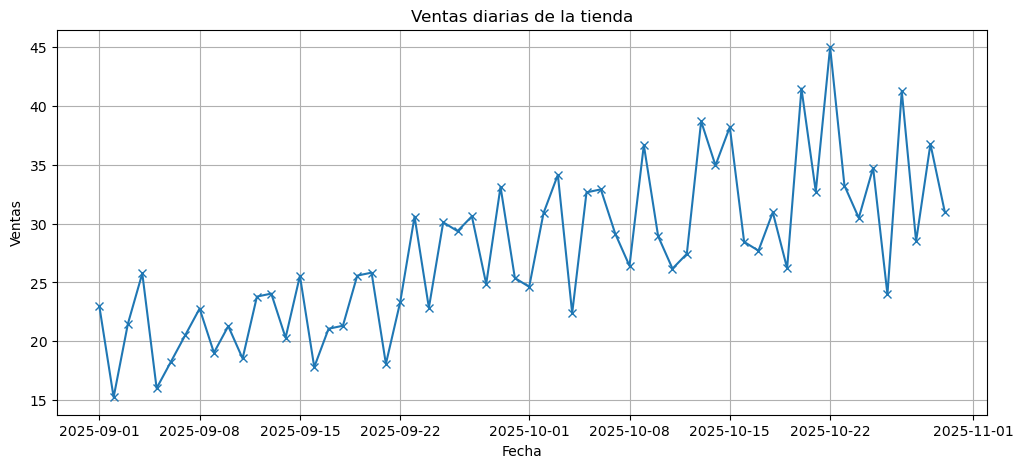

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['fecha'], df['ventas'], marker='x')
plt.title('Ventas diarias de la tienda')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid()
plt.show()

Con una simple gráfica de líneas uno puedo desvelar tendencias, estacionalidad, crecimiento, etc. Pero el ruido diario sigue allí. Con una gráfica así es difícil saber cuáles han sido las mejores semanas y su variación entre ellas.

## La media móvil
A la media móvil también se le conoce como _rolling mean_. En este caso haremos una media móvil semanal para ver más allá del ruido diario, donde hay una gran variabilidad o dispersión.

Vamos a graficar de nuevo, pero ahora añadiremos una nueva línea que incluya el promedio semanal. Como podrás ver, estamos suavizando los datos. 

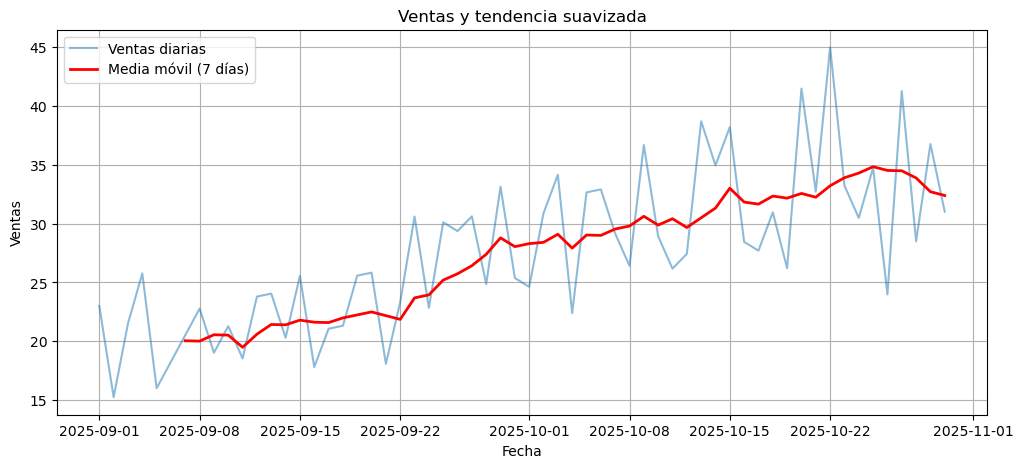

In [13]:
# Media móvil de 7 días para suavizar variabilidad semanal
df['media_movil'] = df['ventas'].rolling(window=7).mean()

plt.figure(figsize=(12,5))
plt.plot(df['fecha'], df['ventas'], alpha=0.5, label='Ventas diarias')
plt.plot(df['fecha'], df['media_movil'], color='red', label='Media móvil (7 días)', linewidth=2)
plt.title('Ventas y tendencia suavizada')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid()
plt.show()


Y con algo tan simple es más fácil ver si hay crecimiento real, caídas o temporalidad. En este caso hay una clara tendencia alcista  con el paso de las semanas, lo cual es una señal clara de que el negocio va en buen camino.

Si prestas atención a la gráfica, notarás que hay días con ventas por encima de 40 y días con ventas por abajo de 20, pero con la media móvil tenemos claro lo que son: excepciones.

## Conclusión final
Las series temporales y la media móvil nos permiten analizar tendencias y patrones en muchos tipos de conjuntos de datos, no sólo datos de ventas. Por ejemplo, podríamos analizar entrenamientos deportivos como decíamos, pero también gastor personales, temperaturas, gastos personales, presupuestos y básicamente cualquier dato secuencial.